## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.
/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/santoshsaxena/anaconda3/l

## Loading dataset

In [2]:
data = pd.read_csv("Desktop/titanic/train.csv")
test = pd.read_csv("Desktop/titanic/test.csv")

## Feature engineering

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.shape

(891, 12)

In [6]:
data = data.dropna(subset=["Age","Embarked"])

In [7]:
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])

In [8]:
encoder_em = LabelEncoder()
data["Embarked"] = encoder_em.fit_transform(data["Embarked"])

In [9]:
features = data.iloc[:,2:12]
features = features.drop(["Name", "Cabin"], axis=1)
features = features.drop(["Ticket"], axis = 1)

In [10]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [11]:
y = data.iloc[:,1]

In [12]:
forest = RandomForestClassifier(n_estimators=len(data),random_state=1)

In [13]:
forest.fit(features, y)

RandomForestClassifier(n_estimators=712, random_state=1)

In [14]:
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]
print(importance)
print(indices)

[0.09149635 0.25032176 0.28729067 0.04743565 0.03797544 0.25754252
 0.02793762]
[2 5 1 0 3 4 6]


In [15]:
important_feature = []
for i in range(len(importance)):
    temp = indices[i]
    important_feature.append(features.columns[temp])

In [16]:
important_feature

['Age', 'Fare', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

Text(0.5, 1.0, 'Feature Selection')

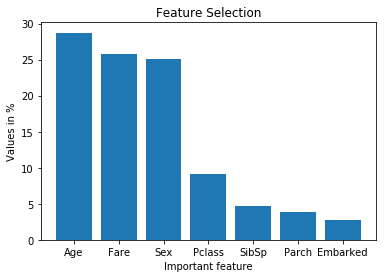

In [17]:
plt.bar(important_feature, np.sort(importance)[::-1]*100)
plt.xlabel("Important feature")
plt.ylabel("Values in %")
plt.title("Feature Selection")

In [18]:
# Picking feature whose % is up to 10%

In [19]:
status = []
for i in y:
    if(i == 0):
        status.append("Dead")
    elif(i == 1):
        status.append("Alive")

In [20]:
X = pd.DataFrame({"Age":features["Age"], "Fare":features["Fare"], "Sex":features["Sex"], "Status":status})

## Data Visulaization

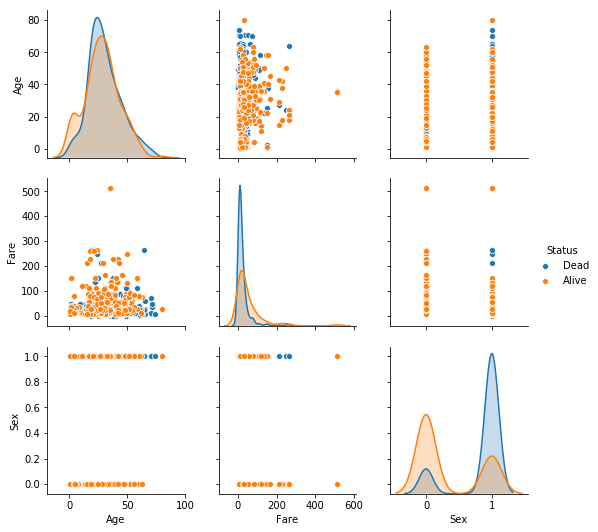

In [21]:
sns.pairplot(X,hue="Status")

In [22]:
Alive = X.loc[X["Status"] == "Alive"]
Dead = X.loc[X["Status"] == "Dead"]

Text(0, 0.5, 'Fare')

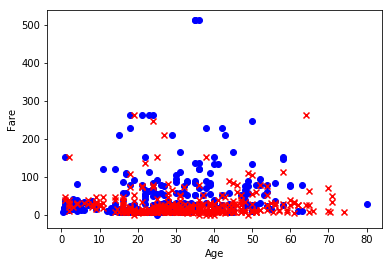

In [23]:
plt.scatter(Alive["Age"], Alive["Fare"], color= "blue", marker = "o")
plt.scatter(Dead["Age"], Dead["Fare"], color = "red", marker = "x")
plt.xlabel("Age")
plt.ylabel("Fare")

In [24]:
X = X.drop(["Status"],axis = 1)

In [25]:
X.head()

,Age,Fare,Sex
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1


## Modelling

In [26]:
cv = KFold(n_splits=10, random_state=1)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
score = cross_val_score(lr,X_test,y_test,cv=10)

In [30]:
max(score)*100

88.23529411764706

In [31]:
score

array([0.83333333, 0.77777778, 0.77777778, 0.72222222, 0.72222222,
       0.77777778, 0.66666667, 0.77777778, 0.76470588, 0.88235294])

In [32]:
for_classifier = RandomForestClassifier()

In [33]:
for_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
score_forest = cross_val_score(for_classifier, X_test,y_test,cv=10)

In [36]:
max(score_forest)

0.8823529411764706

## Testing

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
X_test = pd.DataFrame({"Age":test["Age"], "Fare":test["Fare"], "Sex":test["Sex"]})

In [45]:
X_test["Sex"] = encoder.transform(test["Sex"])

In [46]:
X_test

,Age,Fare,Sex
0,34.5,7.8292,1
1,47.0,7.0000,0
2,62.0,9.6875,1
3,27.0,8.6625,1
4,22.0,12.2875,0
...,...,...,...
413,NaN,8.0500,1
414,39.0,108.9000,0
415,38.5,7.2500,1
416,NaN,8.0500,1


In [52]:
X_test = X_test.fillna(X_test.mean())

In [53]:
test["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [54]:
predictions = lr.predict(X_test)

In [57]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":predictions})
submission.to_csv("submission.csv",index=False)

In [56]:
submissio = pd.read_csv("submission.csv")
submissio.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
len(submissio)

331